In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [5]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS Intern\task 2\train.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Survival:**	0 = No, 1 = Yes 
<br> **pclass**	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
<br> **sibsp**	# of siblings / spouses aboard the Titanic
<br> **parch**	# of parents / children aboard the Titanic	
<br> **ticket**	Ticket number
<br> **fare**	Passenger fare
<br> **cabin**	Cabin number
<br>  **embarked**	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [8]:
#checking for missing values
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
# replace the missing values with the average in the columns
df['Age'] = df['Age'].replace(np.nan,df['Age'].mean())

In [10]:
#remove cabin column since it has 77% missing values
df = df.drop(columns=['Cabin'],axis=1)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
# one-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns= ['Embarked'])

In [13]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_C   891 non-null    bool   
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(3)
memory usage: 72.3+ KB


In [14]:
df_encoded.isnull().sum()/len(df_encoded)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked_C     0.0
Embarked_Q     0.0
Embarked_S     0.0
dtype: float64

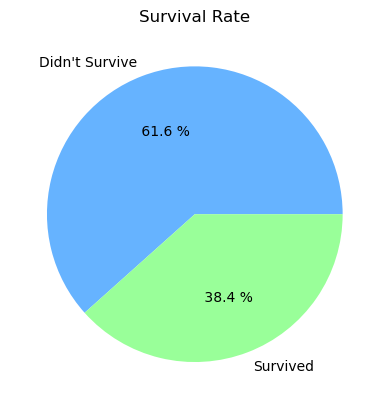

In [15]:
#calculate percentage of survivors
percentages = df_encoded['Survived'].value_counts(normalize=True) * 100
labels = ["Didn't Survive",'Survived']
fig, ax = plt.subplots()
ax.pie(
    percentages,
    labels = labels,
    autopct ='% 1.1f %%',
    colors = ['#66b3ff','#99ff99'],
)
plt.title('Survival Rate')
plt.show()

In [16]:
#create age groups for better visualization
df_encoded['AgeGroup'] = pd.cut(df_encoded['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

In [17]:
# Convert 'Survived' to categorical for better visualization
df_encoded['Survived'] = df_encoded['Survived'].map({0: 'No', 1: 'Yes'})

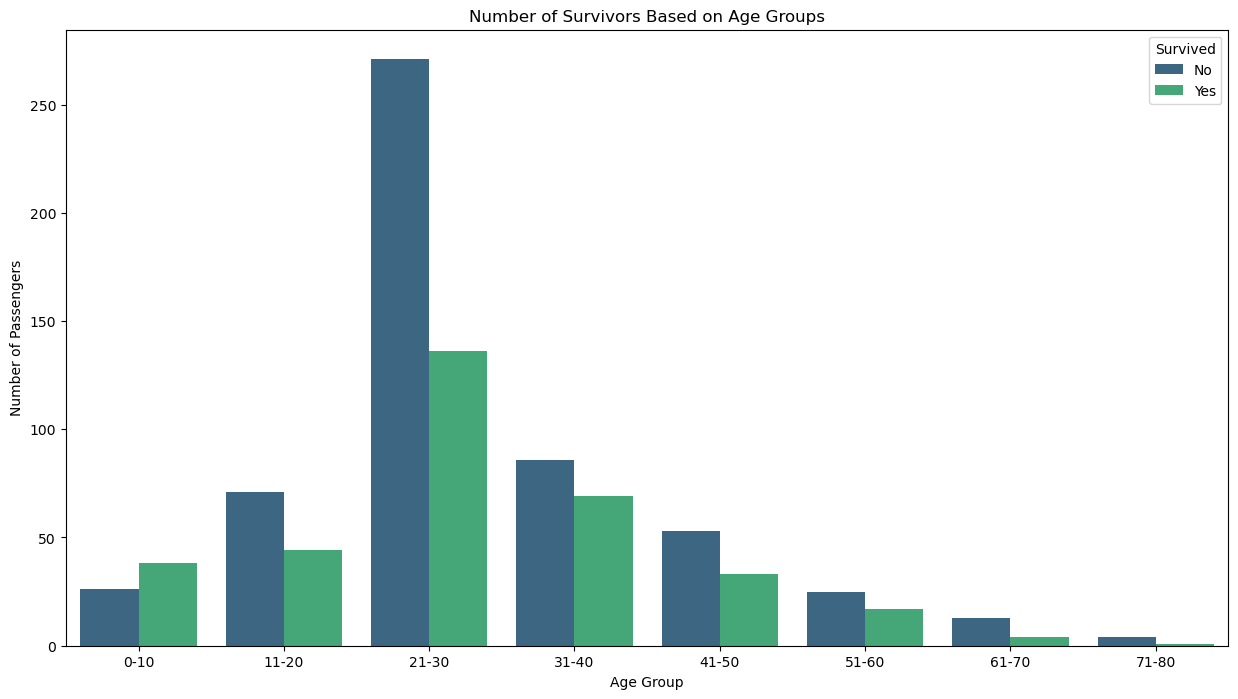

In [18]:
# create the bar plot
plt.figure(figsize=(15, 8))
sns.countplot(data=df_encoded, x='AgeGroup', hue='Survived', palette='viridis')
plt.title('Number of Survivors Based on Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived')
plt.show()

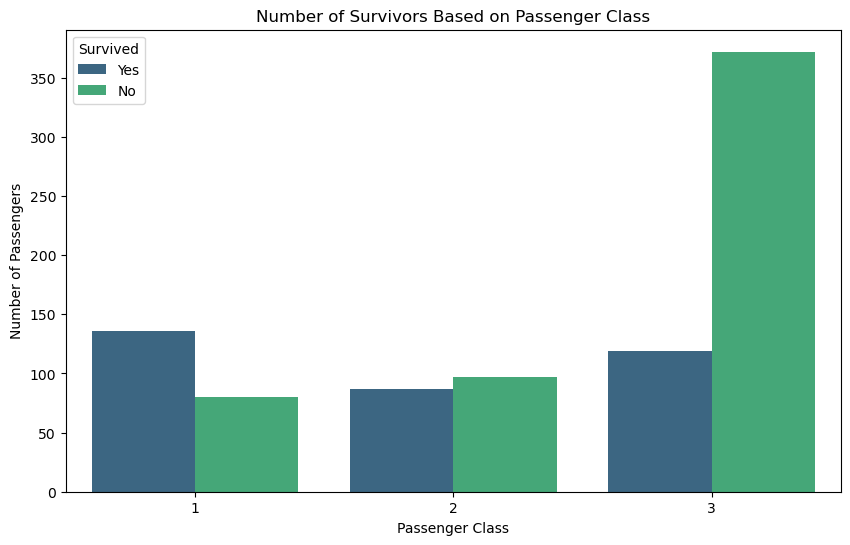

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_encoded, x='Pclass', hue='Survived', palette='viridis')
plt.title('Number of Survivors Based on Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived')
plt.show()

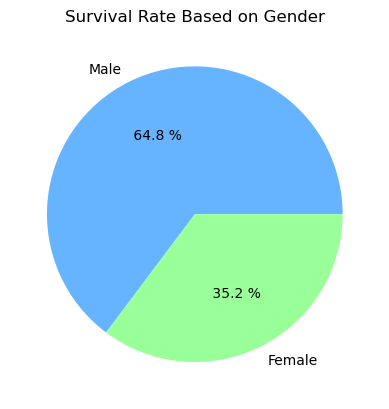

In [20]:
#calculate percentage of survivors based on gended
percentages = df_encoded['Sex'].value_counts(normalize=True) * 100
labels = ["Male",'Female']
fig, ax = plt.subplots()
ax.pie(
    percentages,
    labels = labels,
    autopct ='% 1.1f %%',
    colors = ['#66b3ff','#99ff99'],
)
plt.title('Survival Rate Based on Gender')
plt.show()

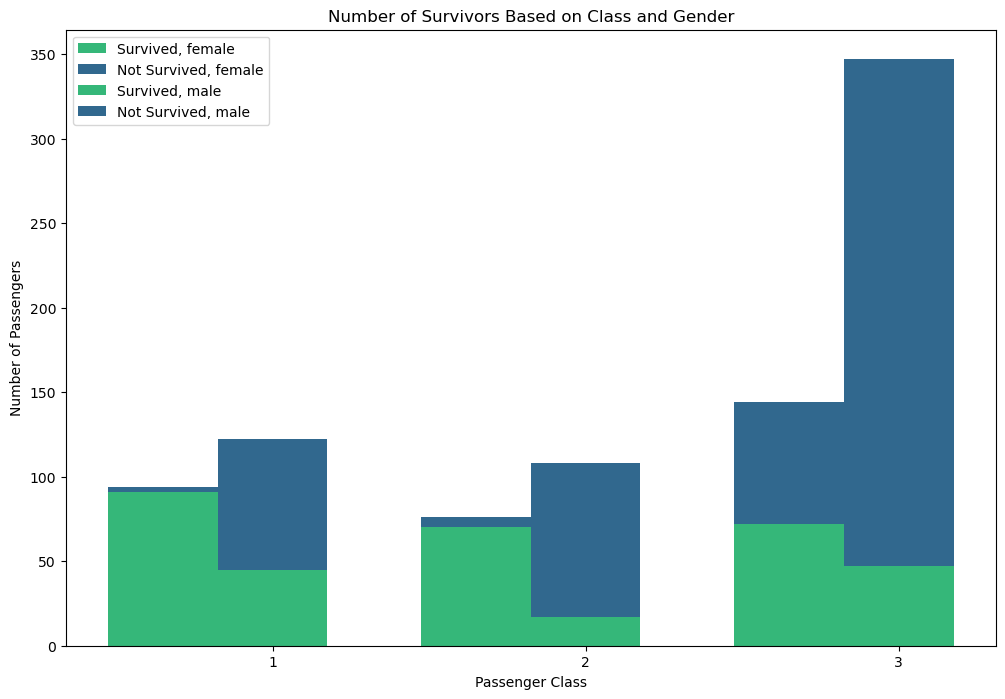

In [21]:
# aggregate data
agg_data = df_encoded.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value=0).reset_index()

# plot
fig, ax = plt.subplots(figsize=(12, 8))

# define colors
colors = sns.color_palette('viridis', 2)

# plot bars for each class and gender
width = 0.35
for i, pclass in enumerate(agg_data['Pclass'].unique()):
    for j, sex in enumerate(agg_data['Sex'].unique()):
        subset = agg_data[(agg_data['Pclass'] == pclass) & (agg_data['Sex'] == sex)]
        ax.bar(
            i + j*width, 
            subset['Yes'].values[0], 
            width, 
            label=f'Survived, {sex}' if i == 0 else "", 
            color=colors[1]
        )
        ax.bar(
            i + j*width, 
            subset['No'].values[0], 
            width, 
            bottom=subset['Yes'].values[0], 
            label=f'Not Survived, {sex}' if i == 0 else "", 
            color=colors[0]
        )

ax.set_xticks([r + width for r in range(len(agg_data['Pclass'].unique()))])
ax.set_xticklabels(agg_data['Pclass'].unique())
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Number of Passengers')
ax.set_title('Number of Survivors Based on Class and Gender')
ax.legend()

plt.show()

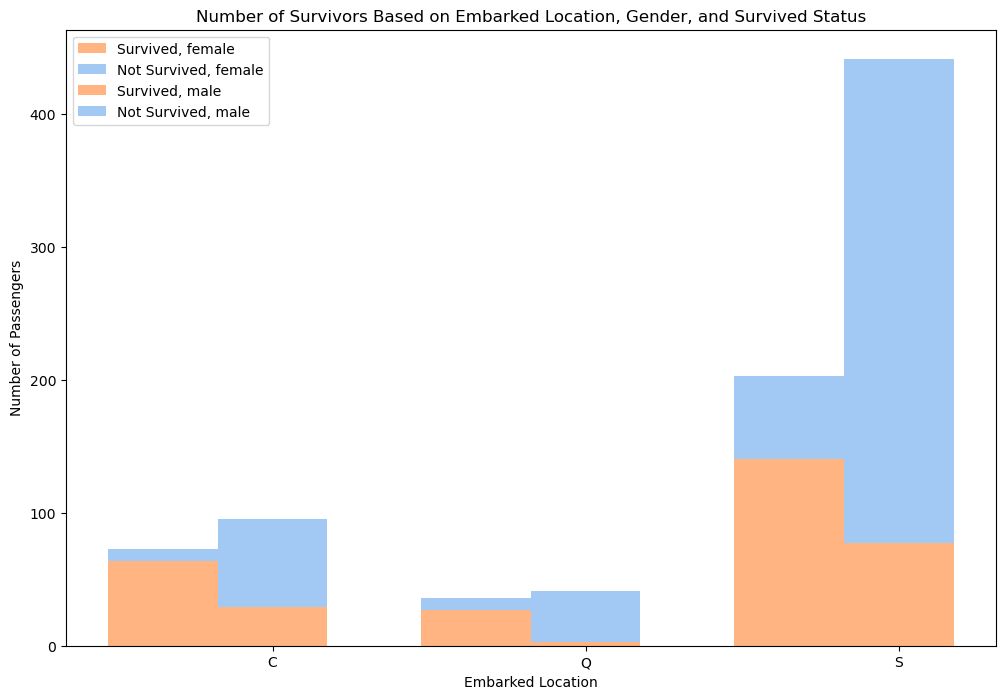

In [22]:
# Convert 'Survived' to categorical for better visualization
df['Survived'] = df['Survived'].map({0: 'No', 1: 'Yes'})

# Drop rows with missing 'Embarked' values
df = df.dropna(subset=['Embarked'])

# Aggregate data
agg_data = df.groupby(['Embarked', 'Sex', 'Survived']).size().unstack(fill_value=0).reset_index()

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define a new color palette
colors = sns.color_palette('pastel', 2)

# Plot bars for each Embarked location and gender
width = 0.35
embarked_locations = agg_data['Embarked'].unique()
for i, embarked in enumerate(embarked_locations):
    for j, sex in enumerate(agg_data['Sex'].unique()):
        subset = agg_data[(agg_data['Embarked'] == embarked) & (agg_data['Sex'] == sex)]
        ax.bar(
            i + j*width, 
            subset['Yes'].values[0], 
            width, 
            label=f'Survived, {sex}' if i == 0 else "", 
            color=colors[1]
        )
        ax.bar(
            i + j*width, 
            subset['No'].values[0], 
            width, 
            bottom=subset['Yes'].values[0], 
            label=f'Not Survived, {sex}' if i == 0 else "", 
            color=colors[0]
        )

# Add labels and title
ax.set_xticks([r + width for r in range(len(embarked_locations))])
ax.set_xticklabels(embarked_locations)
ax.set_xlabel('Embarked Location')
ax.set_ylabel('Number of Passengers')
ax.set_title('Number of Survivors Based on Embarked Location, Gender, and Survived Status')
ax.legend()

plt.show()